## Temporal Topological Data Analysis for scRNA-seq data

### Baihan Lin,  Columbia University

If you have any question, please contact baihan.lin@columbia.edu or doerlbh@gmail.com. 

In [1]:
%matplotlib inline


In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random

import warnings
warnings.filterwarnings("ignore")

from ripser import ripser, Rips
from persim import plot_diagrams

from sklearn import datasets

import pickle as pickle
import gudhi as gd  
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from umap import UMAP

import time

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform as sform

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_theme(style="whitegrid")


## Data loading

In [5]:
data = np.array(pd.read_table('zebrafish_Regev.mapper.tsv'))
lineages = np.asarray([line.rstrip('\n') for line in open('lineages-list.txt')])
lineages_rank = np.asarray([line.rstrip('\n') for line in open('lineages.txt')])

for n in np.arange(25):
    lineages[lineages == lineages_rank[n]] = n
lineages[lineages == 'undefined'] = 26
lineages[lineages == 'pluripotent'] = 27

timepoints = np.asarray([int(line.rstrip('\n')) for line in open('time.txt')])
scaled_data = StandardScaler().fit_transform(data)

print(data.shape)
print(lineages.shape, timepoints.shape)


(38731, 103)
(38731,) (38731,)


In [166]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(scaled_data)
pca_full = PCA(n_components=103).fit_transform(scaled_data)
pca = pca_full[:,:2]
umap = UMAP(n_components=2).fit_transform(scaled_data)

np.save('tsne_scaled.npy', tsne)
np.save('pca_scaled.npy', pca_full)
np.save('umap_scaled.npy', umap)


In [6]:
tsne = np.load('tsne_scaled.npy', allow_pickle=True)
pca_full = np.load('pca_scaled.npy', allow_pickle=True)
umap = np.load('umap_scaled.npy', allow_pickle=True)


## Dimension reduction

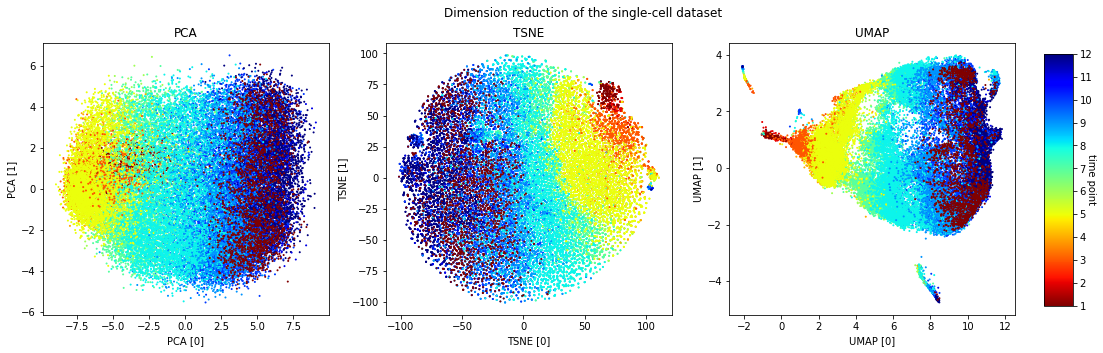

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

s = 1

axes[0].scatter(pca[:,0],pca[:,1],s=s,c=timepoints,cmap='jet_r')
axes[0].set_title('PCA')
axes[0].set_xlabel('PCA [0]')
axes[0].set_ylabel('PCA [1]')

axes[1].scatter(tsne[:,0],tsne[:,1],s=s,c=timepoints,cmap='jet_r')
axes[1].set_title('TSNE')
axes[1].set_xlabel('TSNE [0]')
axes[1].set_ylabel('TSNE [1]')

im = axes[2].scatter(umap[:,0],umap[:,1],s=s,c=timepoints,cmap='jet_r')
axes[2].set_title('UMAP')
axes[2].set_xlabel('UMAP [0]')
axes[2].set_ylabel('UMAP [1]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = plt.colorbar(im, cax=cbar_ax, ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
cbar.ax.set_ylabel('time point', rotation=270)

fig.suptitle('Dimension reduction of the single-cell dataset')
# fig.tight_layout()
plt.savefig('dr.png', dpi=300)
plt.show()


## Temporal persistent homology

In [156]:

sample_sizes = [50, 100, 500, 1000, 5000]
repetition = 50

diagrams_list = []
diagrams_time = []
diagrams_samples = []
diagrams_ids = []

for i in np.arange(repetition):
    print(f'======= {i} =======')
    for n in sample_sizes:
        sample_ids = np.random.choice(len(data), size=n)
        start = time.time()
        diagrams = ripser(scaled_data[sample_ids])['dgms']
        end = time.time()
        diagrams_list.append(diagrams)
        diagrams_time.append(end - start)
        diagrams_ids.append(i)
        diagrams_samples.append(n)

diagrams_df = pd.DataFrame(data={'diagram': diagrams_list, 'run_time': diagrams_time, 'sample_size': diagrams_samples, 'id': diagrams_ids})
diagrams_df.to_csv('diagrams_df.csv', index=False)


======= 0 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 1 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 2 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 3 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 4 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 5 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 6 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 7 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 8 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 9 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 10 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 11 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 12 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 13 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 14 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 15 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 16 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 17 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 18 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 19 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 20 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 21 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 22 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 23 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 24 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 25 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 26 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 27 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 28 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 29 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 30 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 31 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 32 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 33 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 34 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 35 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 36 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 37 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 38 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 39 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 40 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 41 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 42 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 43 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 44 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 45 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 46 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 47 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 48 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


======= 49 =======


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


sample size:  50


/var/folders/kj/fxjdr0_94s1bs0ldglkv345h0000gn/T/ipykernel_23999/3905307774.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_diagrams = np.array(diagrams_list)[np.array(diagrams_ids)==0]


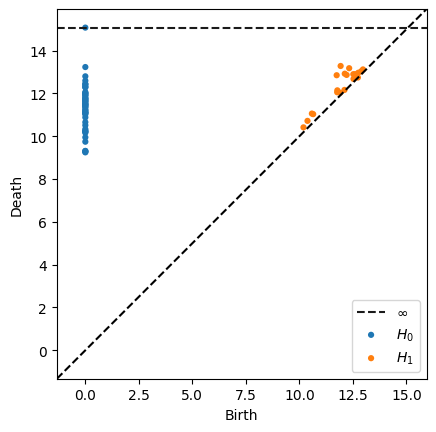

sample size:  100


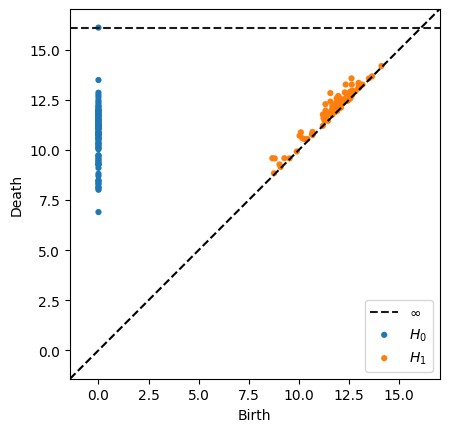

sample size:  500


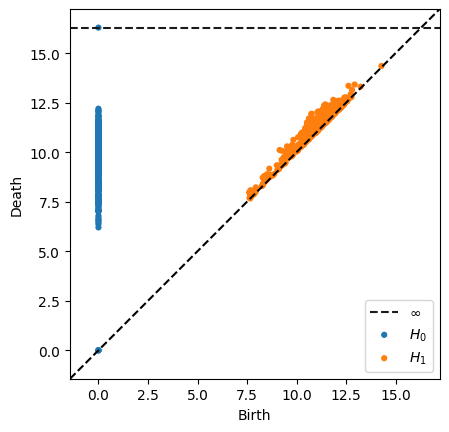

sample size:  1000


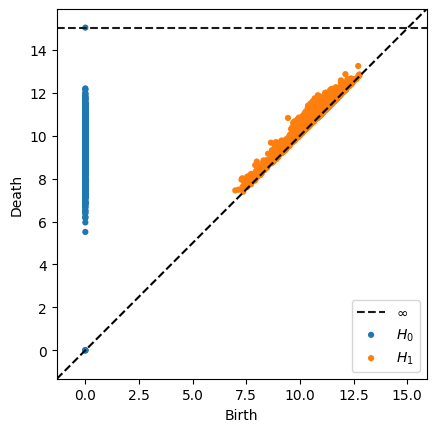

sample size:  5000


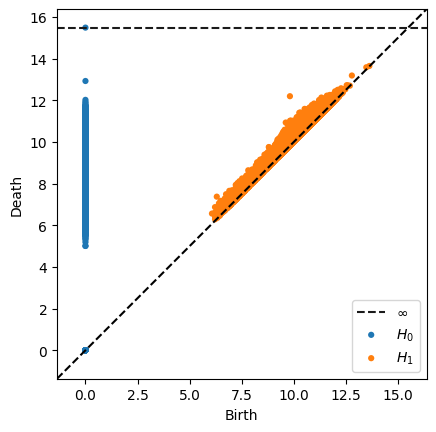

In [159]:
selected_diagrams = np.array(diagrams_list)[np.array(diagrams_ids)==0]
for i, n in enumerate(sample_sizes):
    print('sample size: ', n)
    plot_diagrams(list(selected_diagrams[i]), show=True)


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/seaborn/categorical.py:373: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


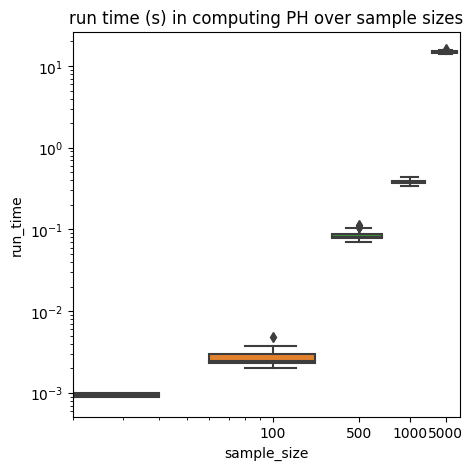

In [168]:
fig, ax = plt.subplots(1,1,figsize=(5, 5))
ax.set_xscale("log")
ax.set_yscale("log")

sns.boxplot(
    data=diagrams_df, x="sample_size", y="run_time", ax=ax
)
ax.set_title('run time (s) in computing PH over sample sizes')

# fig.tight_layout()
plt.savefig('rtime_ph.png', dpi=300)

In [169]:

pca_dimensions = [2, 10, 20, 50, 103]
repetition = 50

diagrams_list = []
diagrams_time = []
diagrams_dims = []
diagrams_ids = []

for i in np.arange(repetition):
    print(f'======= {i} =======')
    for n in pca_dimensions:
        sample_ids = np.random.choice(len(data), size=1000)
        start = time.time()
        diagrams = ripser(pca[sample_ids,:n])['dgms']
        end = time.time()
        diagrams_list.append(diagrams)
        diagrams_time.append(end - start)
        diagrams_ids.append(i)
        diagrams_dims.append(n)

diagrams_pca_df = pd.DataFrame(data={'diagram': diagrams_list, 'run_time': diagrams_time, 'pca_dim': diagrams_dims, 'id': diagrams_ids})
diagrams_pca_df.to_csv('diagrams_pca_df.csv', index=False)


======= 0 =======
======= 1 =======
======= 2 =======
======= 3 =======
======= 4 =======
======= 5 =======
======= 6 =======
======= 7 =======
======= 8 =======
======= 9 =======
======= 10 =======
======= 11 =======
======= 12 =======
======= 13 =======
======= 14 =======
======= 15 =======
======= 16 =======
======= 17 =======
======= 18 =======
======= 19 =======
======= 20 =======
======= 21 =======
======= 22 =======
======= 23 =======
======= 24 =======
======= 25 =======
======= 26 =======
======= 27 =======
======= 28 =======
======= 29 =======
======= 30 =======
======= 31 =======
======= 32 =======
======= 33 =======
======= 34 =======
======= 35 =======
======= 36 =======
======= 37 =======
======= 38 =======
======= 39 =======
======= 40 =======
======= 41 =======
======= 42 =======
======= 43 =======
======= 44 =======
======= 45 =======
======= 46 =======
======= 47 =======
======= 48 =======
======= 49 =======


pca dimension:  2


/var/folders/kj/fxjdr0_94s1bs0ldglkv345h0000gn/T/ipykernel_23999/3328371379.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_diagrams = np.array(diagrams_list)[np.array(diagrams_ids)==0]


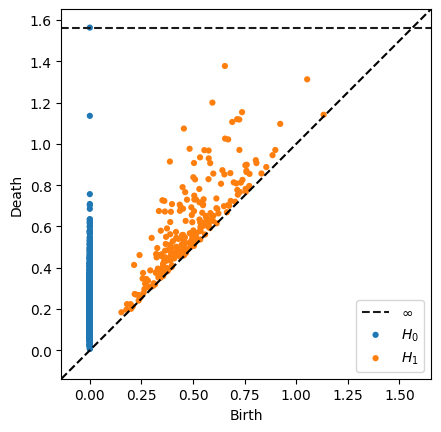

pca dimension:  10


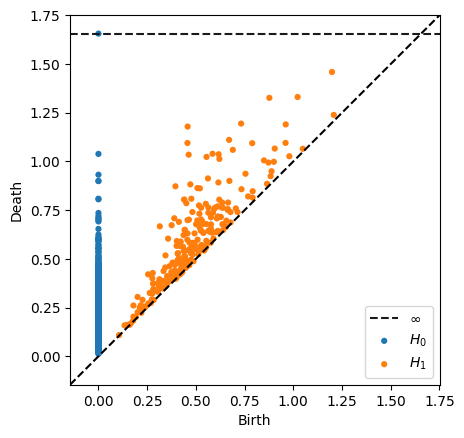

pca dimension:  20


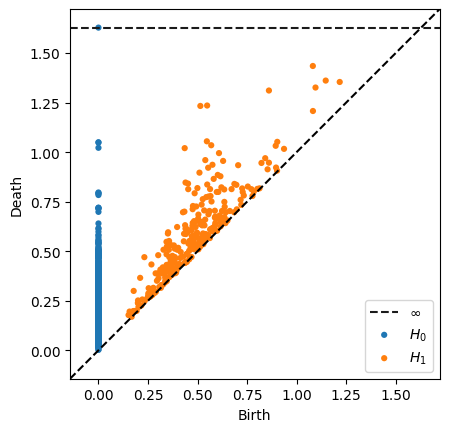

pca dimension:  50


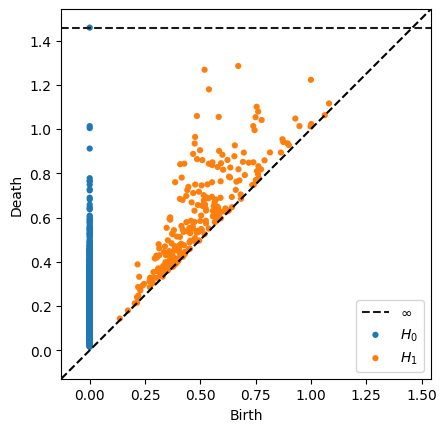

pca dimension:  103


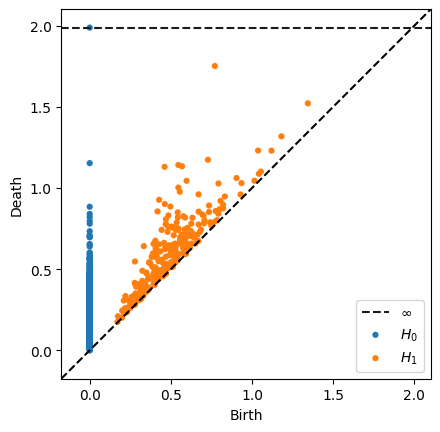

In [172]:
selected_diagrams = np.array(diagrams_list)[np.array(diagrams_ids)==0]
for i, n in enumerate(pca_dimension):
    print('pca dimension: ', n)
    plot_diagrams(list(selected_diagrams[i]), show=True)


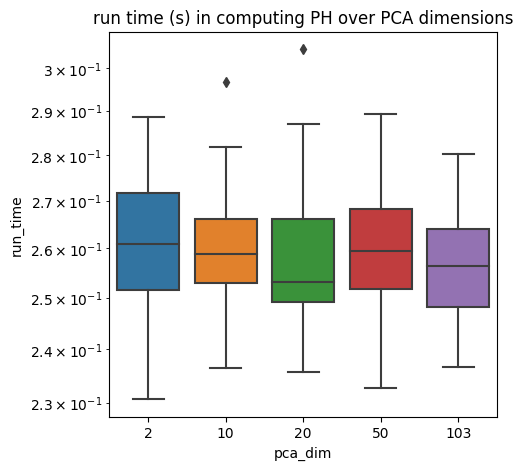

In [173]:
fig, ax = plt.subplots(1,1,figsize=(5, 5))
# ax.set_xscale("log")
ax.set_yscale("log")


ax.set_xticks([1, 10, 100, 1000, 10000])
sns.boxplot(
    data=diagrams_pca_df, x="pca_dim", y="run_time", ax=ax
)
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_title('run time (s) in computing PH over PCA dimensions')

# fig.tight_layout()
plt.savefig('rtime_ph_pca.png', dpi=300)


In [179]:
def get_temporal_ph(data, timepoints, sample_ids):
    
    uniq_timepoints = sorted(np.unique(timepoints))
    pair_timepoints = [(uniq_timepoints[i],uniq_timepoints[i+1]) for i in np.arange(len(uniq_timepoints)-1)]
    selected_timepoints = np.array(timepoints)[sample_ids]
    selected_data = np.array(data)[sample_ids]
    
    diagrams_h0 = []
    diagrams_h1 = []
    
    for pts in pair_timepoints:
        subset_rule = (selected_timepoints == pts[0]) | (selected_timepoints == pts[1])
        subset_data = selected_data[subset_rule]
        if len(subset_data) > 0:
            diagrams_pts_h0, diagrams_pts_h1 = ripser(subset_data)['dgms']
            diagrams_h0 += list(diagrams_pts_h0)
            diagrams_h1 += list(diagrams_pts_h1)
        
    diagrams_h0 = np.array([list(f) for f in list(set([tuple(d) for d in diagrams_h0]))])
    diagrams_h1 = np.array([list(f) for f in list(set([tuple(d) for d in diagrams_h1]))])
    diagrams = [diagrams_h0, diagrams_h1]
    
    return diagrams
        

In [182]:

sample_sizes = [50, 100, 500, 1000, 5000]
repetition = 50

diagrams_list = []
diagrams_time = []
diagrams_samples = []
diagrams_ids = []

for i in np.arange(repetition):
    print(f'======= {i} =======')
    for n in sample_sizes:
        sample_ids = np.random.choice(len(data), size=n)
        start = time.time()
        diagrams = get_temporal_ph(scaled_data, timepoints, sample_ids)
        end = time.time()
        diagrams_list.append(diagrams)
        diagrams_time.append(end - start)
        diagrams_ids.append(i)
        diagrams_samples.append(n)

temporal_diagrams_df = pd.DataFrame(data={'diagram': diagrams_list, 'run_time': diagrams_time, 'sample_size': diagrams_samples, 'id': diagrams_ids})
temporal_diagrams_df.to_csv('temporal_diagrams_df.csv', index=False)


sample size:  50


/var/folders/kj/fxjdr0_94s1bs0ldglkv345h0000gn/T/ipykernel_23999/3905307774.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_diagrams = np.array(diagrams_list)[np.array(diagrams_ids)==0]


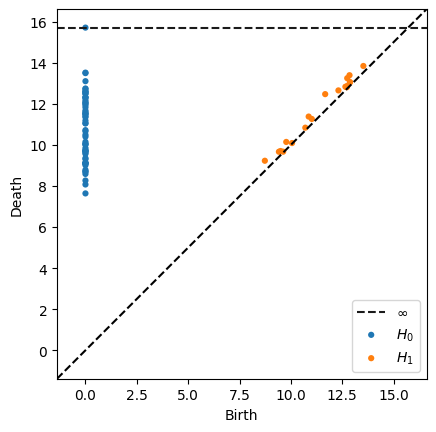

sample size:  100


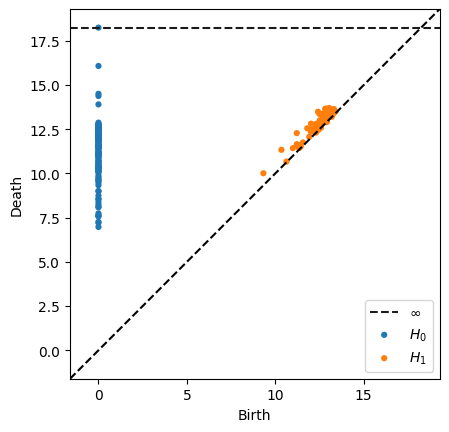

sample size:  500


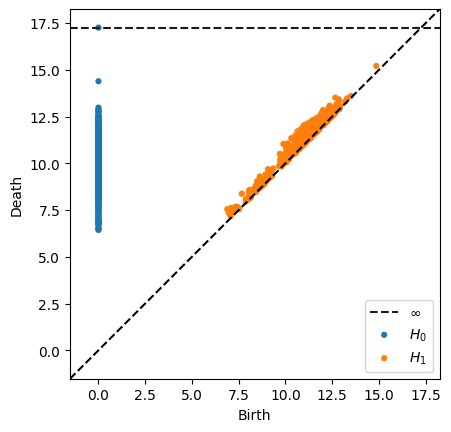

sample size:  1000


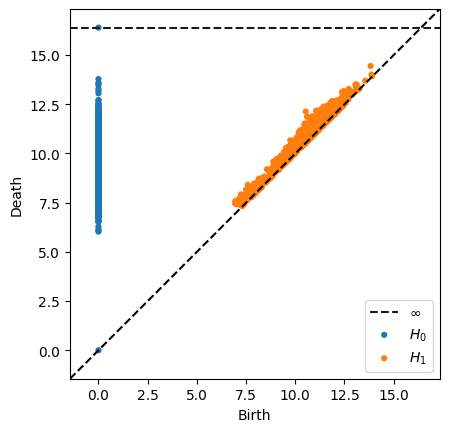

sample size:  5000


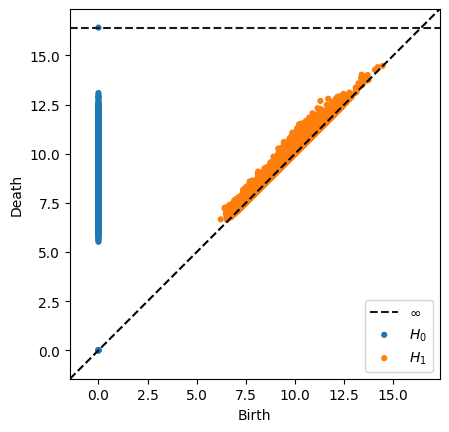

In [184]:
selected_diagrams = np.array(diagrams_list)[np.array(diagrams_ids)==0]
for i, n in enumerate(sample_sizes):
    print('sample size: ', n)
    plot_diagrams(list(selected_diagrams[i]), show=True)


/Users/doerlbh/miniforge3/envs/tf39/lib/python3.9/site-packages/seaborn/categorical.py:373: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


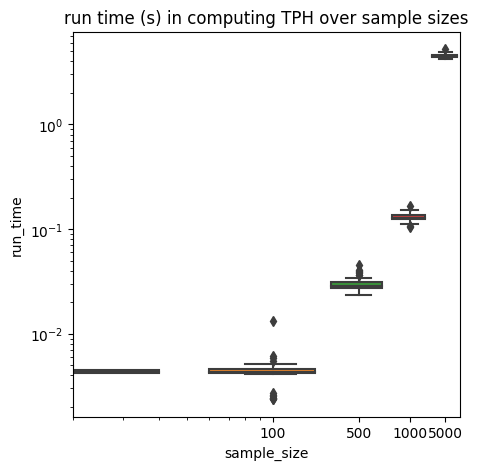

In [183]:
fig, ax = plt.subplots(1,1,figsize=(5, 5))
ax.set_xscale("log")
ax.set_yscale("log")

sns.boxplot(
    data=temporal_diagrams_df, x="sample_size", y="run_time", ax=ax
)
ax.set_title('run time (s) in computing TPH over sample sizes')

# fig.tight_layout()
plt.savefig('rtime_tph.png', dpi=300)


## Temporal mapper visualization 

This uses tkMapper (our modified repository based on kepler Mapper)

In [43]:
mapper = km.KeplerMapper(verbose=2)

X_projected = tsne

graph = mapper.map(X_projected,
                   # inverse_X=data,
                   nr_cubes=40,
                   time_label=timepoints.astype(int),
                   time_filtration=1,
                   clusterer=sklearn.cluster.DBSCAN())

html = mapper.visualize(graph, path_html="zebrafish_Regev_tSNE_timepoint_DBSCAN_tkMapper.html",
                        title="zebrafish scRNA-seq t-SNE across timepoints",
                        color_function=timepoints,
                        save_file=True)


## Simplicial analysis 


In [7]:

def shuffle(x):
    return sorted(x, key=lambda k: np.random.random())
    
def get_simplex_counts(data, max_order=8):
    
    skeleton = gd.RipsComplex(points = data, max_edge_length = 0.2)
    filtrations = list(skeleton.create_simplex_tree(max_dimension = max_order).get_filtration())
    fcounts = np.zeros(max_order+1,)
    for f in filtrations:
        fcounts[len(f[0])-1] += 1
    
    return fcounts

def get_control(data, null_type='dist_shuffle'):
    control = np.ndarray((data.shape))
    if null_type == 'feat_shuffle':
        for i in np.arange(data.shape[1]):
            control[:,i] = data[np.random.choice(len(data), size=len(data)),i]
    elif null_type == 'dist_shuffle':
        sdist = sform(shuffle(pdist(data)))
        control = MDS(n_components=data.shape[1], dissimilarity='precomputed').fit_transform(sdist)
    return control

def get_simplicial_statistics(data,max_order=8):
    
    fcounts = get_simplex_counts(data,max_order)
    fcounts_c_dist = get_simplex_counts(get_control(data,'dist_shuffle'))
    fcounts_c_feat = get_simplex_counts(get_control(data,'feat_shuffle'))
    
    df_dict = {'sc': [], 'csc': [], 'csc2':[], 'nsc': [], 'nsc2':[], 'order': []}
    df_mat = np.zeros((len(fcounts), 5))
    
    for i, c in enumerate(fcounts):
        
#         scores = [fcounts[i], fcounts_c_dist[i], fcounts_c_feat[i], fcounts[i]/fcounts_c_dist[i], fcounts[i]/fcounts_c_feat[i]]
        scores = [fcounts[i], fcounts_c_dist[i], fcounts_c_feat[i], fcounts[i]/(fcounts_c_dist[i]+fcounts[i]), fcounts[i]/(fcounts_c_feat[i]+fcounts[i])]
#         scores = np.nan_to_num(scores, nan=0.5)
        df_dict['sc'].append(scores[0])
        df_dict['csc'].append(scores[1])
        df_dict['csc2'].append(scores[2])
        df_dict['nsc'].append(scores[3])
        df_dict['nsc2'].append(scores[4])
        df_dict['order'].append(i)
        df_mat[i,:] = scores
        
    return df_dict, df_mat
    
def get_temporal_simplicial_statistics(data, timepoints, sample_size=200, max_order=8):
    
    uniq_timepoints = sorted(np.unique(timepoints))
    df_dict = {'sc': [], 'csc': [], 'csc2':[], 'nsc': [], 'nsc2':[], 'order': [], 'time_step': []}
    df_tensor = np.zeros((len(uniq_timepoints), max_order+1, 5))

    for i, tp in enumerate(uniq_timepoints):
        
        subset_rule = (np.array(timepoints) == tp) 
        subset_data = data[subset_rule]
        sample_ids = np.random.choice(len(subset_data), size=sample_size)
        selected_data = subset_data[sample_ids]        
        df_dict_t, df_mat_t = get_simplicial_statistics(selected_data,max_order)
        
        df_dict['sc'] += df_dict_t['sc']
        df_dict['csc'] += df_dict_t['csc']
        df_dict['csc2'] += df_dict_t['csc2']
        df_dict['nsc'] += df_dict_t['nsc']
        df_dict['nsc2'] += df_dict_t['nsc2']
        df_dict['order'] += df_dict_t['order']
        df_dict['time_step'] += [tp] * len(df_dict_t['sc'])
        
        df_tensor[i,:,:] = df_mat_t
    
    return df_dict, df_tensor

def get_random_trials(data, timepoints, sample_size=200, num_trials=50, num_timesteps=12, num_orders=9):
    
    df_dict = {'sc': [], 'csc': [], 'csc2':[], 'nsc': [], 'nsc2':[], 'order': [], 'time_step': [], 'trial_id': []}
    df_tensor = np.zeros((num_trials, num_timesteps, num_orders, 5))
    
    for i in np.arange(num_trials):
        
        df_dict_t, df_tensor_t = get_temporal_simplicial_statistics(data, timepoints, sample_size)
        
        df_dict['sc'] += df_dict_t['sc']
        df_dict['csc'] += df_dict_t['csc']
        df_dict['csc2'] += df_dict_t['csc2']
        df_dict['nsc'] += df_dict_t['nsc']
        df_dict['nsc2'] += df_dict_t['nsc2']
        df_dict['time_step'] += df_dict_t['time_step']
        df_dict['order'] += df_dict_t['order']
        df_dict['trial_id'] += [i] * len(df_dict_t['sc'])
        
        df_tensor[i,:,:,:] = df_tensor_t
    
    return df_dict, df_tensor

def mat2surf(mat,timepoints=timepoints):
    
    x = list(sorted(np.unique(timepoints)))
    y = np.arange(mat.shape[1])
    x, y = np.meshgrid(x, y)
    z = mat.T
    
    return x, y, z 
    

In [8]:
df_dict, df_tensor = get_temporal_simplicial_statistics(pca_full[:,:2], timepoints, sample_size=200)

df_tensor.shape

(12, 9, 5)

In [75]:
num_trials, num_timesteps, num_orders = 50, 12, 9
# sample_sizes = np.arange(25,301,25)
sample_sizes = [50, 100, 200, 300]

df_dict = {'sc': [], 'csc': [], 'csc2':[], 'nsc': [], 'nsc2':[], 'order': [], 'time_step': [], 'trial_id': [], 'sample_size': []}
df_tensor = np.zeros((len(sample_sizes), num_trials, num_timesteps, num_orders, 5))

sample_size_list, run_time_list = [], []
        
for i, n in enumerate(sample_sizes):
    
    print('sample size:',n)
    start = time.time()
    df_dict_t, df_tensor_t = get_random_trials(pca_full[:,:2], timepoints, sample_size=n, num_trials=num_trials, num_timesteps=num_timesteps, num_orders=num_orders)
    end = time.time()
    run_time_list.append(end - start)

    df_dict['sc'] += df_dict_t['sc']
    df_dict['csc'] += df_dict_t['csc']
    df_dict['csc2'] += df_dict_t['csc2']
    df_dict['nsc'] += df_dict_t['nsc']
    df_dict['nsc2'] += df_dict_t['nsc2']
    df_dict['time_step'] += df_dict_t['time_step']
    df_dict['order'] += df_dict_t['order']
    df_dict['trial_id'] += df_dict_t['trial_id']
    df_dict['sample_size'] += [n] * len(df_dict_t['sc'])
            
    df_tensor[i,:,:,:,:] = df_tensor_t
    
sample_df = pd.DataFrame(data=df_dict) 
sample_df.to_csv('sample_df.csv', index=False)


sample size: 10
sample size: 20
sample size: 30
sample size: 40
sample size: 50
sample size: 60
sample size: 70
sample size: 80
sample size: 90


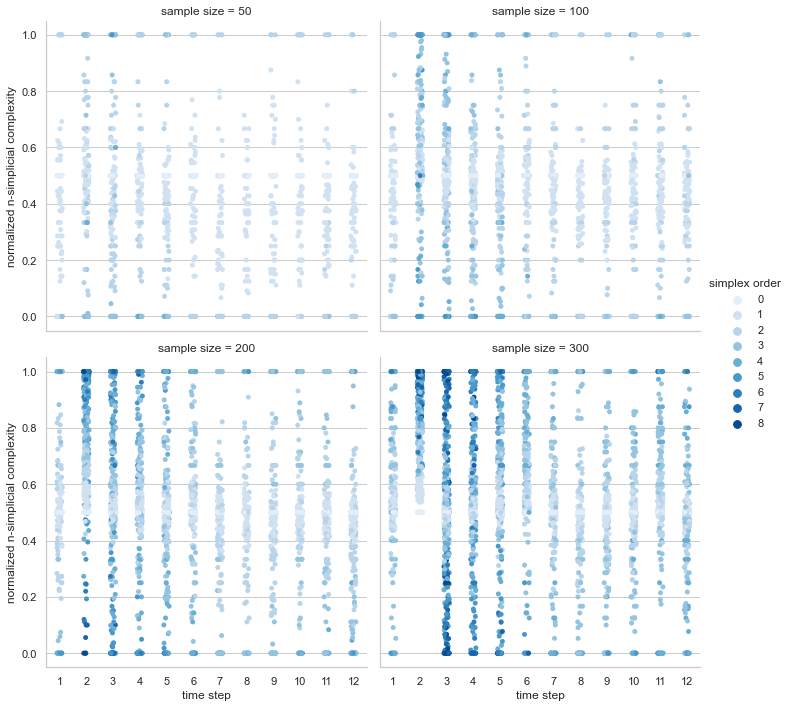

In [94]:
sample_df['normalized n-simplicial complexity'] = sample_df['nsc2']
sample_df['time step'] = sample_df['time_step']
sample_df['simplex order'] = sample_df['order']
sample_df['sample size'] = sample_df['sample_size']

sns.catplot(
    data=sample_df_backup, x="time step", y="normalized n-simplicial complexity", 
    hue="simplex order",
    col="sample size", col_wrap=2, kind="strip",
    palette="Blues", ax=ax
)

ax.set_title('stability of simplicial analysis over sample sizes')

# fig.tight_layout()
plt.savefig('sample_nsc.png', dpi=300)
